In [1]:
import numpy as np
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

cl.OCLArray([[  1,   1,   1, ..., 546, 546, 546],
       [  1,   1,   1, ..., 546, 546, 546],
       [  1,   1,   1, ..., 546, 546, 546],
       ...,
       [ 13,  13,  13, ..., 551, 551, 551],
       [ 13,  13,  13, ..., 551, 551, 551],
       [ 13,  13,  13, ..., 551, 551, 551]], dtype=uint32)
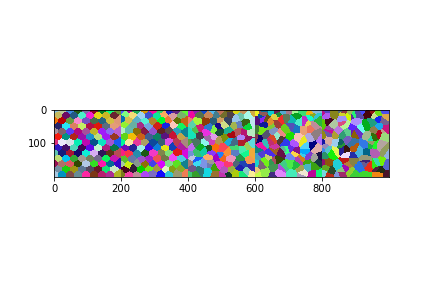

In [2]:
def example_data():
    sigmas = [0, 2, 5, 8, 10]
    result = None
    for sigma in sigmas:
        
        tissue = cle.artificial_tissue_2d(
            random_sigma_x=sigma, 
            random_sigma_y=sigma, 
            width=200, 
            height=200)
        
        if result is None:
            result = tissue
        else:
            result = cle.combine_horizontally(result, tissue)
    
    borders = cle.detect_label_edges(result)
    objects = cle.binary_not(borders)
    result = cle.voronoi_labeling(objects)
    
    return result

labels = example_data()
labels

cl.OCLArray([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       ...,
       [2., 2., 2., ..., 3., 3., 3.],
       [2., 2., 2., ..., 3., 3., 3.],
       [2., 2., 2., ..., 3., 3., 3.]], dtype=float32)
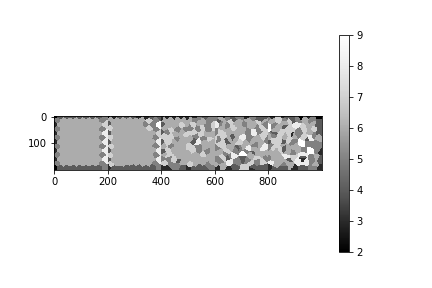
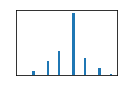

In [3]:
neighbor_count_map = cle.touching_neighbor_count_map(labels)
neighbor_count_map

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
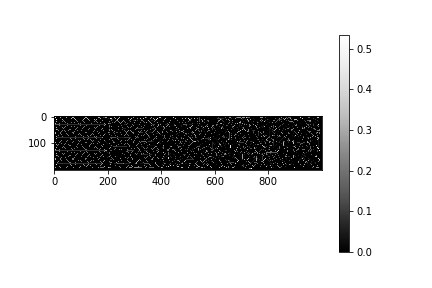
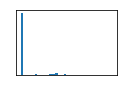

In [4]:
touch_portion_mesh = cle.draw_touch_portion_mesh_between_touching_labels(labels)
touch_portion_mesh

cl.OCLArray([[0.32608694, 0.32608694, 0.32608694, ..., 0.06756756, 0.06756756,
        0.06756756],
       [0.32608694, 0.32608694, 0.32608694, ..., 0.06756756, 0.06756756,
        0.06756756],
       [0.32608694, 0.32608694, 0.32608694, ..., 0.06756756, 0.06756756,
        0.06756756],
       ...,
       [0.09375   , 0.09375   , 0.09375   , ..., 0.02339182, 0.02339182,
        0.02339182],
       [0.09375   , 0.09375   , 0.09375   , ..., 0.02339182, 0.02339182,
        0.02339182],
       [0.09375   , 0.09375   , 0.09375   , ..., 0.02339182, 0.02339182,
        0.02339182]], dtype=float32)
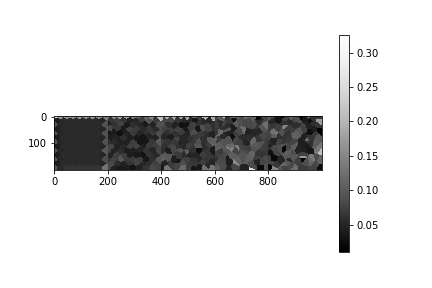
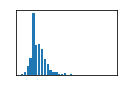

In [5]:
std_touch_portion_map = cle.standard_deviation_touch_portion_map(labels)
std_touch_portion_map

cl.OCLArray([[0.17836885, 0.17836885, 0.17836885, ..., 0.10193261, 0.10193261,
        0.10193261],
       [0.17836885, 0.17836885, 0.17836885, ..., 0.10193261, 0.10193261,
        0.10193261],
       [0.17836885, 0.17836885, 0.17836885, ..., 0.10193261, 0.10193261,
        0.10193261],
       ...,
       [0.06359681, 0.06359681, 0.06359681, ..., 0.07269549, 0.07269549,
        0.07269549],
       [0.06359681, 0.06359681, 0.06359681, ..., 0.07269549, 0.07269549,
        0.07269549],
       [0.06359681, 0.06359681, 0.06359681, ..., 0.07269549, 0.07269549,
        0.07269549]], dtype=float32)
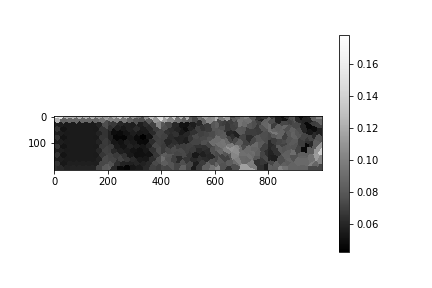
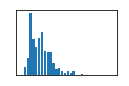

In [6]:
mean_std_touch_portion_map = cle.mean_of_touching_neighbors_map(std_touch_portion_map, labels)
mean_std_touch_portion_map

cl.OCLArray([[0.9660918, 0.9660918, 0.9660918, ..., 0.9660918, 0.9660918,
        0.9660918],
       [0.9660918, 0.9660918, 0.9660918, ..., 0.9660918, 0.9660918,
        0.9660918],
       [0.9660918, 0.9660918, 0.9660918, ..., 0.9660918, 0.9660918,
        0.9660918],
       ...,
       [0.9660918, 0.9660918, 0.9660918, ..., 0.8451542, 0.8451542,
        0.8451542],
       [0.9660918, 0.9660918, 0.9660918, ..., 0.8451542, 0.8451542,
        0.8451542],
       [0.9660918, 0.9660918, 0.9660918, ..., 0.8451542, 0.8451542,
        0.8451542]], dtype=float32)
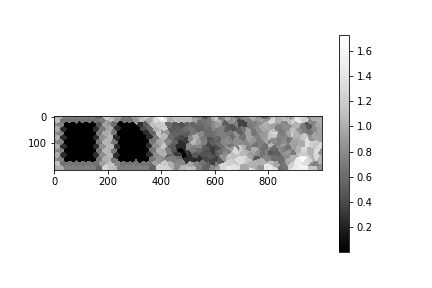
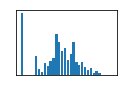

In [7]:
std_neighbor_count_map = cle.standard_deviation_of_touching_neighbors_map(neighbor_count_map, labels)
std_neighbor_count_map

Text(0, 0.5, 'AU (normalized)')

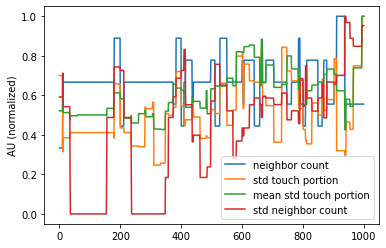

In [10]:
neighbor_count_lr = np.asarray(neighbor_count_map[100])
std_touch_portion_lr = np.asarray(std_touch_portion_map[100])
mean_std_touch_portion_lr = np.asarray(mean_std_touch_portion_map[100])
std_neighbor_count_lr = np.asarray(std_neighbor_count_map[100])

plt.plot(neighbor_count_lr / neighbor_count_lr.max())
plt.plot(std_touch_portion_lr / std_touch_portion_lr.max())
plt.plot(mean_std_touch_portion_lr / mean_std_touch_portion_lr.max())
plt.plot(std_neighbor_count_lr / std_neighbor_count_lr.max())
plt.legend(["neighbor count", "std touch portion", "mean std touch portion", "std neighbor count"])
plt.ylabel("AU (normalized)")

In [9]:
[print(k) for k in cle.operations(["map"]).keys()]
None

average_distance_of_n_closest_neighbors_map
average_distance_of_n_nearest_neighbors_map
average_distance_to_n_nearest_other_labels_map
extension_ratio_map
label_maximum_extension_map
label_maximum_extension_ratio_map
label_maximum_intensity_map
label_mean_extension_map
label_mean_intensity_map
label_minimum_intensity_map
label_nonzero_pixel_count_map
label_nonzero_pixel_count_ratio_map
label_overlap_count_map
label_pixel_count_map
label_standard_deviation_intensity_map
local_maximum_touching_neighbor_count_map
local_mean_touching_neighbor_count_map
local_median_touching_neighbor_count_map
local_minimum_touching_neighbor_count_map
local_standard_deviation_touching_neighbor_count_map
maximum_extension_map
maximum_intensity_map
maximum_of_distal_neighbors_map
maximum_of_n_nearest_neighbors_map
maximum_of_proximal_neighbors_map
maximum_of_touching_neighbors_map
mean_extension_map
mean_intensity_map
mean_of_distal_neighbors_map
mean_of_n_nearest_neighbors_map
mean_of_proximal_neighbors_map
